In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

Pulling the packages that I'm likely to use. This will likely grow...

In [3]:
happy = pd.read_csv('/Users/danielnanas/Downloads/2015.csv', index_col=0)
footy = pd.read_csv('/Users/danielnanas/Downloads/results.csv', index_col = 0)

Read in the datasets. 'happy' is a dataset examining world happiness scores across several different variables including, health & GDP. 'footy' is my football dataset with every competitive international football match ever played.

In [4]:
happy.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
col_names = ["region","happiness_rank", "happiness_score","standard_error","gdp","family","health","freedom","gov_trust","generoisty","dystopia"]

In [6]:
happy_cols = pd.read_csv('/Users/danielnanas/Downloads/2015.csv', header = 0, names = col_names)

In [7]:
happy_cols.head()

,region,happiness_rank,happiness_score,standard_error,gdp,family,health,freedom,gov_trust,generoisty,dystopia
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
happy_cols.region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: region, dtype: int64

In [9]:
happy_cols.sort_values("happiness_rank", ascending=False).head(10)

,region,happiness_rank,happiness_score,standard_error,gdp,family,health,freedom,gov_trust,generoisty,dystopia
Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [10]:
happy_cols["happiness_score"].mean()

5.3757341772151905

In [11]:
happy_cols.sort_values("health").head()

,region,happiness_rank,happiness_score,standard_error,gdp,family,health,freedom,gov_trust,generoisty,dystopia
Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009
Botswana,Sub-Saharan Africa,128,4.332,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181
Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676
Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832


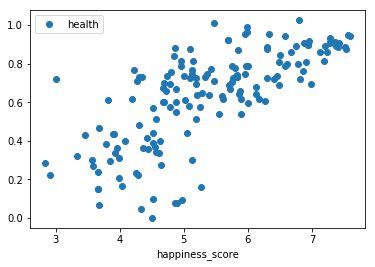

In [12]:
happy_cols.plot(x="happiness_score",y="health", style="o")

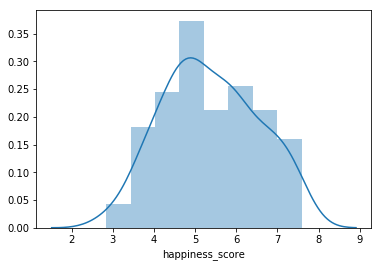

In [13]:
sns.distplot(happy_cols["happiness_score"]);

In [14]:
footy.head()

,home_team,away_team,home_score,away_score,tournament,city,country
date,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1873-03-08,England,Scotland,4,2,Friendly,London,England
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
1875-03-06,England,Scotland,2,2,Friendly,London,England
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [15]:
footy.tournament.value_counts().head(10)

Friendly                                16250
FIFA World Cup qualification             7074
UEFA Euro qualification                  2332
African Cup of Nations qualification     1558
FIFA World Cup                            836
Copa América                              787
AFC Asian Cup qualification               711
African Cup of Nations                    638
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64

In [16]:
footy.dtypes

home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
dtype: object

In [17]:
footy.shape

(38759, 7)

In [18]:
footy['home_team'].head(10)

date
1872-11-30    Scotland
1873-03-08     England
1874-03-07    Scotland
1875-03-06     England
1876-03-04    Scotland
1876-03-25    Scotland
1877-03-03     England
1877-03-05       Wales
1878-03-02    Scotland
1878-03-23    Scotland
Name: home_team, dtype: object

In [19]:
footy.describe(include='all')

,home_team,away_team,home_score,away_score,tournament,city,country
count,38759,38759,38759.000000,38759.000000,38759,38759,38759
unique,244,244,NaN,NaN,95,1798,268
top,Brazil,Uruguay,NaN,NaN,Friendly,Kuala Lumpur,USA
freq,546,519,NaN,NaN,16250,569,1078
mean,NaN,NaN,1.728579,1.194871,NaN,NaN,NaN
std,NaN,NaN,1.722286,1.398132,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN


In [20]:
footy.home_team.value_counts()

Brazil                       546
Argentina                    530
Germany                      487
Mexico                       480
England                      474
Sweden                       472
France                       459
Hungary                      443
Korea Republic               441
Italy                        432
Austria                      407
Netherlands                  403
Switzerland                  394
Belgium                      392
Denmark                      390
Norway                       387
Chile                        384
USA                          379
Poland                       369
Scotland                     369
Egypt                        366
Kenya                        357
Spain                        352
Japan                        351
Saudi Arabia                 336
Uruguay                      331
Malawi                       324
China                        323
Indonesia                    320
Finland                      319
          

In [21]:
footy.away_team.value_counts().head()

Uruguay    519
Sweden     516
England    499
Hungary    465
Germany    439
Name: away_team, dtype: int64

Some things I'd like to be able to do:
    - ~~add columns that show the winning & losing teams~~
    - add a column that's simply the year of the game
    - figure out what to do with countries that don't exist anymore/have become other countries
    - figure out what to do with friendlies and irrelevant tournaments
    - add a column w/ winning team's previous WC finish

In [22]:
footy.city.value_counts()['São Paulo']

77

In [23]:
footy[(footy.home_score > footy.away_score)].head()

,home_team,away_team,home_score,away_score,tournament,city,country
date,,,,,,,
1873-03-08,England,Scotland,4,2,Friendly,London,England
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland
1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland


In [24]:
home_wins = footy[(footy.home_score > footy.away_score)]

In [25]:
home_wins.head()

,home_team,away_team,home_score,away_score,tournament,city,country
date,,,,,,,
1873-03-08,England,Scotland,4,2,Friendly,London,England
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland
1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland


In [26]:
footy.drop("city", axis=1, inplace=True)

In [27]:
def find_winner(row):
    if row['home_score'] - row['away_score'] > 0:
        return row['home_team']
    elif row['home_score'] - row['away_score'] < 0:
        return row['away_team']
    else:
        return 'Draw'

In [28]:
def find_loser(row):
    if row['home_score'] - row['away_score'] < 0:
        return row['home_team']
    elif row['home_score'] - row['away_score'] > 0:
        return row['away_team']
    else:
        return 'Draw'

In [29]:
footy['winner'] = footy.apply(lambda row: find_winner(row),axis=1)

In [30]:
footy['loser'] = footy.apply(lambda row: find_loser(row), axis=1)

In [31]:
def home_points(row):
    points = 0
    if row['home_team'] == row['winner']:
        points += 3
    elif row['home_team'] == row['loser']:
        pass
    else:
        points += 1
    return points

In [32]:
footy['home_points'] = footy.apply(lambda row: home_points(row), axis=1)

In [33]:
def away_points(row):
    points = 0
    if row['home_team'] == row['winner']:
        pass
    elif row['home_team'] == row['loser']:
        points += 3
    else:
        points += 1
    return points

In [34]:
footy['away_points'] = footy.apply(lambda row: away_points(row), axis=1)

In [35]:
footy.home_points.mean()

1.6791970897081967

In [36]:
footy.away_points.mean()

1.0890115844062025

In [37]:
footy.head()

,home_team,away_team,home_score,away_score,tournament,country,winner,loser,home_points,away_points
date,,,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Scotland,Draw,Draw,1,1
1873-03-08,England,Scotland,4,2,Friendly,England,England,Scotland,3,0
1874-03-07,Scotland,England,2,1,Friendly,Scotland,Scotland,England,3,0
1875-03-06,England,Scotland,2,2,Friendly,England,Draw,Draw,1,1
1876-03-04,Scotland,England,3,0,Friendly,Scotland,Scotland,England,3,0


I need to find a dataset w/ WC finish by country, by year
What should I do with non-WC teams?
    - Remove matches where neither team has qualified for the 2018 WC
    - Remove matches where neither team competed in the following WC
    - Remove all matches with teams that have never competed in a WC
    
Not sure what to do with this 'date' column... looks like an index... can I turn it into a string?

In [38]:
footy.shape

(38759, 10)

In [39]:
footy.describe()

,home_score,away_score,home_points,away_points
count,38759.000000,38759.000000,38759.000000,38759.000000
mean,1.728579,1.194871,1.679197,1.089012
std,1.722286,1.398132,1.324519,1.271828
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,3.000000
max,31.000000,22.000000,3.000000,3.000000


In [40]:
footy.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'winner', 'loser', 'home_points', 'away_points'],
      dtype='object')

In [41]:
footy.reset_index(level=['date'],inplace=True)

In [42]:
footy.date.describe()

count          38759
unique         14772
top       2012-02-29
freq              66
Name: date, dtype: object

In [43]:
footy.head()

,date,home_team,away_team,home_score,away_score,tournament,country,winner,loser,home_points,away_points
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,Draw,Draw,1,1
1,1873-03-08,England,Scotland,4,2,Friendly,England,England,Scotland,3,0
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,Scotland,England,3,0
3,1875-03-06,England,Scotland,2,2,Friendly,England,Draw,Draw,1,1
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,Scotland,England,3,0


In [44]:
footy['date_dt'] = pd.to_datetime(footy['date'])

In [45]:
footy['date_dt'].dt.year.tail(20)

38739    2017
38740    2017
38741    2017
38742    2017
38743    2017
38744    2017
38745    2017
38746    2017
38747    2017
38748    2017
38749    2017
38750    2017
38751    2017
38752    2018
38753    2018
38754    2018
38755    2018
38756    2018
38757    2018
38758    2018
Name: date_dt, dtype: int64

In [46]:
footy['year'] = footy['date_dt'].dt.year

In [47]:
footy['year'].value_counts()

2008    1075
2004    1059
2011    1049
2000    1022
2012     991
2001     990
2007     953
2013     952
2015     942
2003     902
2016     879
2017     861
2009     850
1997     843
2010     839
2014     829
1996     827
2006     812
2005     774
2002     746
1993     717
1999     705
1998     692
1995     622
1992     582
1989     580
1985     571
1994     569
1988     545
1984     536
        ... 
1886       7
1885       7
2018       7
1892       6
1887       6
1884       6
1889       6
1890       6
1897       6
1896       6
1895       6
1898       6
1899       6
1900       6
1901       6
1894       6
1883       5
1891       5
1893       5
1882       5
1880       3
1879       3
1881       3
1876       2
1878       2
1877       2
1874       1
1872       1
1875       1
1873       1
Name: year, Length: 147, dtype: int64

In [48]:
footy.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,country,winner,loser,home_points,away_points,date_dt,year
38749,2017-12-28,Kuwait,United Arab Emirates,0,0,Friendly,Kuwait,Draw,Draw,1,1,2017-12-28,2017
38750,2017-12-29,Qatar,Bahrain,1,1,Friendly,Kuwait,Draw,Draw,1,1,2017-12-29,2017
38751,2017-12-29,Iraq,Yemen,3,0,Friendly,Kuwait,Iraq,Yemen,3,0,2017-12-29,2017
38752,2018-01-02,Oman,Bahrain,1,0,Friendly,Kuwait,Oman,Bahrain,3,0,2018-01-02,2018
38753,2018-01-02,Iraq,United Arab Emirates,0,0,Friendly,Kuwait,Draw,Draw,1,1,2018-01-02,2018
38754,2018-01-05,Oman,United Arab Emirates,0,0,Friendly,Kuwait,Draw,Draw,1,1,2018-01-05,2018
38755,2018-01-07,Estonia,Sweden,1,1,Friendly,United Arab Emirates,Draw,Draw,1,1,2018-01-07,2018
38756,2018-01-11,Jordan,Finland,1,2,Friendly,United Arab Emirates,Finland,Jordan,0,3,2018-01-11,2018
38757,2018-01-11,Indonesia,Iceland,0,6,Friendly,Indonesia,Iceland,Indonesia,0,3,2018-01-11,2018
38758,2018-01-14,Indonesia,Iceland,1,4,Friendly,Indonesia,Iceland,Indonesia,0,3,2018-01-14,2018


In [49]:
footy["tournament"].value_counts().head()

Friendly                                16250
FIFA World Cup qualification             7074
UEFA Euro qualification                  2332
African Cup of Nations qualification     1558
FIFA World Cup                            836
Name: tournament, dtype: int64

In [50]:
footy[footy.year>2013].shape

(3518, 13)

In [51]:
footy[footy.year>1978].shape

(28122, 13)

In [52]:
recent_results = footy[footy.year>1978]

In [53]:
recent_results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,winner,loser,home_points,away_points,date_dt,year
10637,1979-01-07,Guinea-Bissau,Cape Verde,3,0,Amílcar Cabral Cup,Guinea-Bissau,Guinea-Bissau,Cape Verde,3,0,1979-01-07,1979
10638,1979-01-08,Gambia,Mauritania,3,1,Amílcar Cabral Cup,Guinea-Bissau,Gambia,Mauritania,3,0,1979-01-08,1979
10639,1979-01-08,Guinea,Mali,0,1,Amílcar Cabral Cup,Guinea-Bissau,Mali,Guinea,0,3,1979-01-08,1979
10640,1979-01-09,Cape Verde,Senegal,0,1,Amílcar Cabral Cup,Guinea-Bissau,Senegal,Cape Verde,0,3,1979-01-09,1979
10641,1979-01-10,Gambia,Mali,0,1,Amílcar Cabral Cup,Guinea-Bissau,Mali,Gambia,0,3,1979-01-10,1979


In [54]:
recent_results["home_points"].mean()

1.676374368821563

In [55]:
recent_results["away_points"].mean()

1.078870635089965